<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dia 1 -

Referências:
* https://jakevdp.github.io/PythonDataScienceHandbook/ - Esse livro contém uma boa introdução ao Python e aos métodos "clássicos" de machine learning.
*

In [4]:
from sklearn.datasets import fetch_openml

# Carregar os dados MNIST
mnist = fetch_openml('mnist_784', version=1, parser="pandas")

# O conjunto de dados é retornado como um objeto semelhante a um dicionário com os dados e os alvos
X, y = mnist["data"], mnist["target"]

# X é o array de imagens, e y é o array de rótulos
# Cada imagem é representada como um array 1D de 784 características (28x28 pixels)
# Você pode querer converter os rótulos (y) para inteiros
y = y.astype(int)

# Agora você pode usar X e y para treinar um modelo de aprendizado de máquina

In [7]:
X = X.to_numpy()
Y = y.to_numpy()

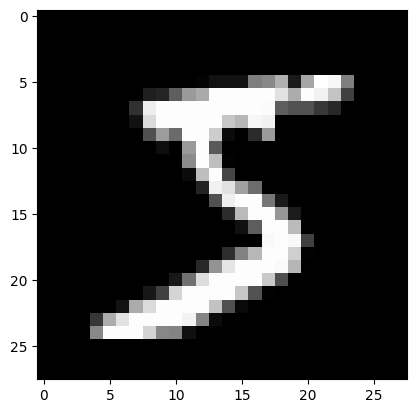

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape((28,28)), cmap="gray")
plt.show()

In [14]:
plt.imshow(X[0])

5

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [12]:
y_pred = model.predict(X)

In [14]:
y_pred, Y

(array([4.24166265, 1.18218974, 3.19922958, ..., 7.87853978, 5.58042962,
        5.77723502]),
 array([5, 0, 4, ..., 4, 5, 6]))

In [18]:
import numpy as np
Y2 = np.array([np.eye(10)[_] for _ in Y])

In [19]:
model.fit(X,Y2)

LinearRegression()

In [21]:
y2 = model.predict(X)

In [28]:
(np.argmax(y2, axis=-1) == np.argmax(Y2, axis=-1)).sum()/len(X)

0.8578857142857143